In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shashanknecrothapa/ames-housing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/hermann/.cache/kagglehub/datasets/shashanknecrothapa/ames-housing-dataset/versions/1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
data = pd.read_csv(path + "/AmesHousing.csv")
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:
data.shape

(2930, 82)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
print(data.describe(include="object"))

       MS Zoning Street Alley Lot Shape Land Contour Utilities Lot Config  \
count       2930   2930   198      2930         2930      2930       2930   
unique         7      2     2         4            4         3          5   
top           RL   Pave  Grvl       Reg          Lvl    AllPub     Inside   
freq        2273   2918   120      1859         2633      2927       2140   

       Land Slope Neighborhood Condition 1  ... Garage Type Garage Finish  \
count        2930         2930        2930  ...        2773          2771   
unique          3           28           9  ...           6             3   
top           Gtl        NAmes        Norm  ...      Attchd           Unf   
freq         2789          443        2522  ...        1731          1231   

       Garage Qual Garage Cond Paved Drive Pool QC  Fence Misc Feature  \
count         2771        2771        2930      13    572          106   
unique           5           5           3       4      4            5   
top   

### comprehension de la variable cible

#### Univarié

In [8]:
data_sales = data["SalePrice"]
data_sales.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

In [9]:
data_sales.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

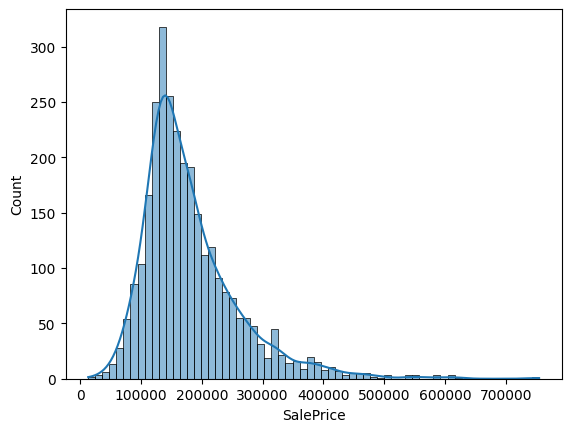

In [10]:
sns.histplot(data_sales, kde=True)

<Axes: xlabel='SalePrice'>

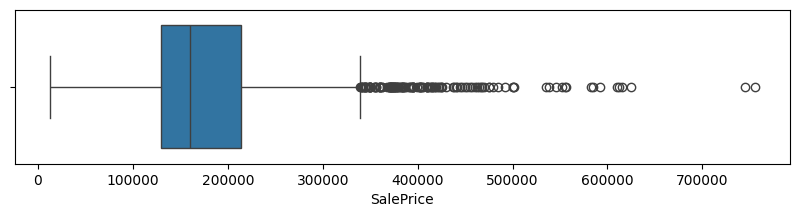

In [11]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=data_sales)

((array([-3.49555212, -3.25141499, -3.11638513, ...,  3.11638513,
          3.25141499,  3.49555212]),
  array([ 12789,  13100,  34900, ..., 625000, 745000, 755000])),
 (74825.86317555293, 180796.0600682594, 0.935802601104888))

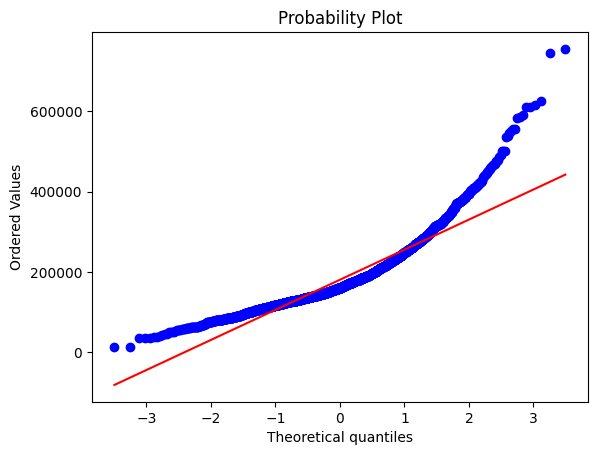

In [12]:
stats.probplot(data_sales, dist="norm", plot=plt)

In [13]:
print("Skewness:", data_sales.skew())
print("Kurtosis:", data_sales.kurt())

Skewness: 1.7435000757376466
Kurtosis: 5.118899951130896


notre variable cible n'a clairement pas une distribution normale

<Axes: xlabel='SalePrice', ylabel='Count'>

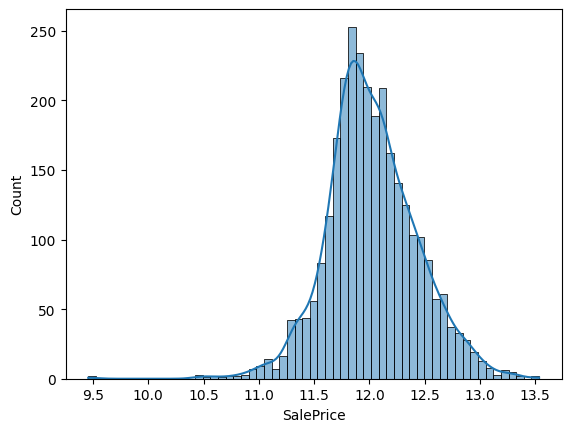

In [14]:
# application du logarithme et vérification de l'amélioration de la normalité
data_sales_log = np.log1p(data_sales)
sns.histplot(data_sales_log, kde=True)

<Axes: xlabel='SalePrice'>

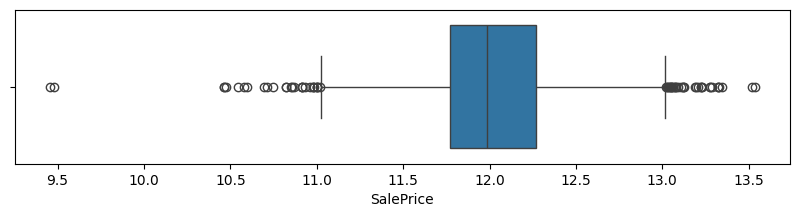

In [15]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=data_sales_log)

((array([-3.49555212, -3.25141499, -3.11638513, ...,  3.11638513,
          3.25141499,  3.49555212]),
  array([ 9.45641889,  9.48044384, 10.46027076, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.40491843894808516, 12.020975245392641, 0.9925612613420501))

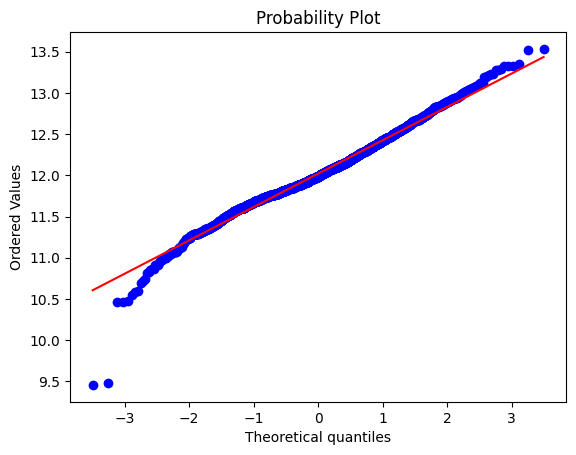

In [16]:
stats.probplot(data_sales_log, dist="norm", plot=plt)

In [17]:
print("Skewness:", data_sales_log.skew())
print("Kurtosis:", data_sales_log.kurt())

Skewness: -0.014772659537224382
Kurtosis: 1.5138180928006526


In [18]:
# identification des outliers
Q1 = data_sales.quantile(0.25)
Q3 = data_sales.quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data_sales < Q1 - 1.5 * IQR) | (data_sales > Q3 + 1.5 * IQR)]

In [19]:
outliers.shape

(137, 82)

In [20]:
Q1 = data_sales_log.quantile(0.25)
Q3 = data_sales_log.quantile(0.75)
IQR = Q3 - Q1
outliers_log = data[(data_sales_log < Q1 - 1.5 * IQR) | (data_sales_log > Q3 + 1.5 * IQR)]
outliers_log.shape

(60, 82)

#### bivarié

In [21]:
data_numerics = data.select_dtypes(include=["int", "float"])
data_numerics.shape


(2930, 39)

In [22]:
data["SalePriceLog"] = data_sales_log

<Axes: >

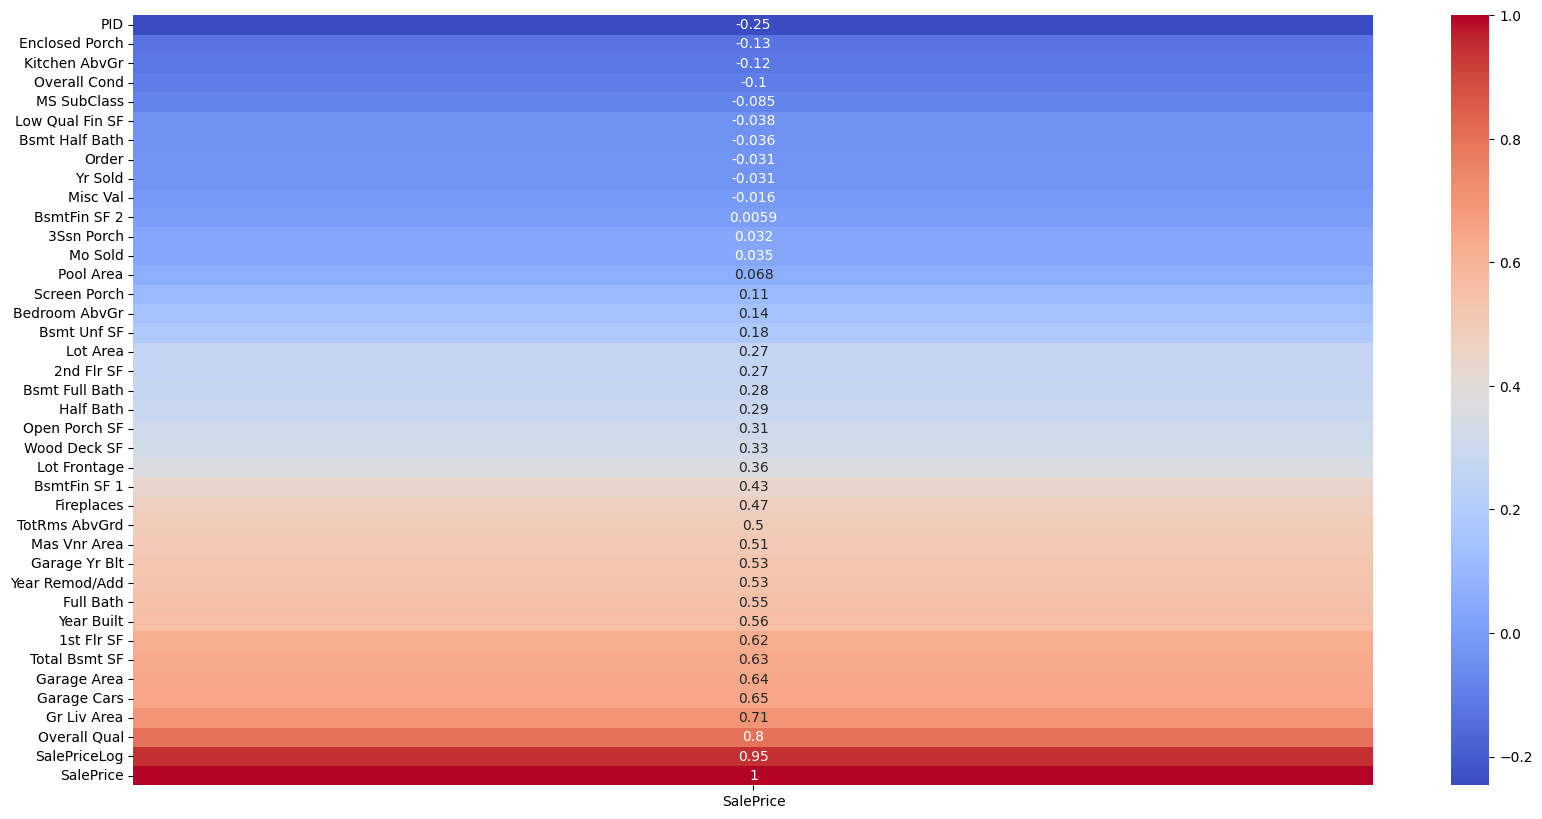

In [23]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix[['SalePrice']].sort_values("SalePrice"), annot=True, cmap="coolwarm")

<Axes: >

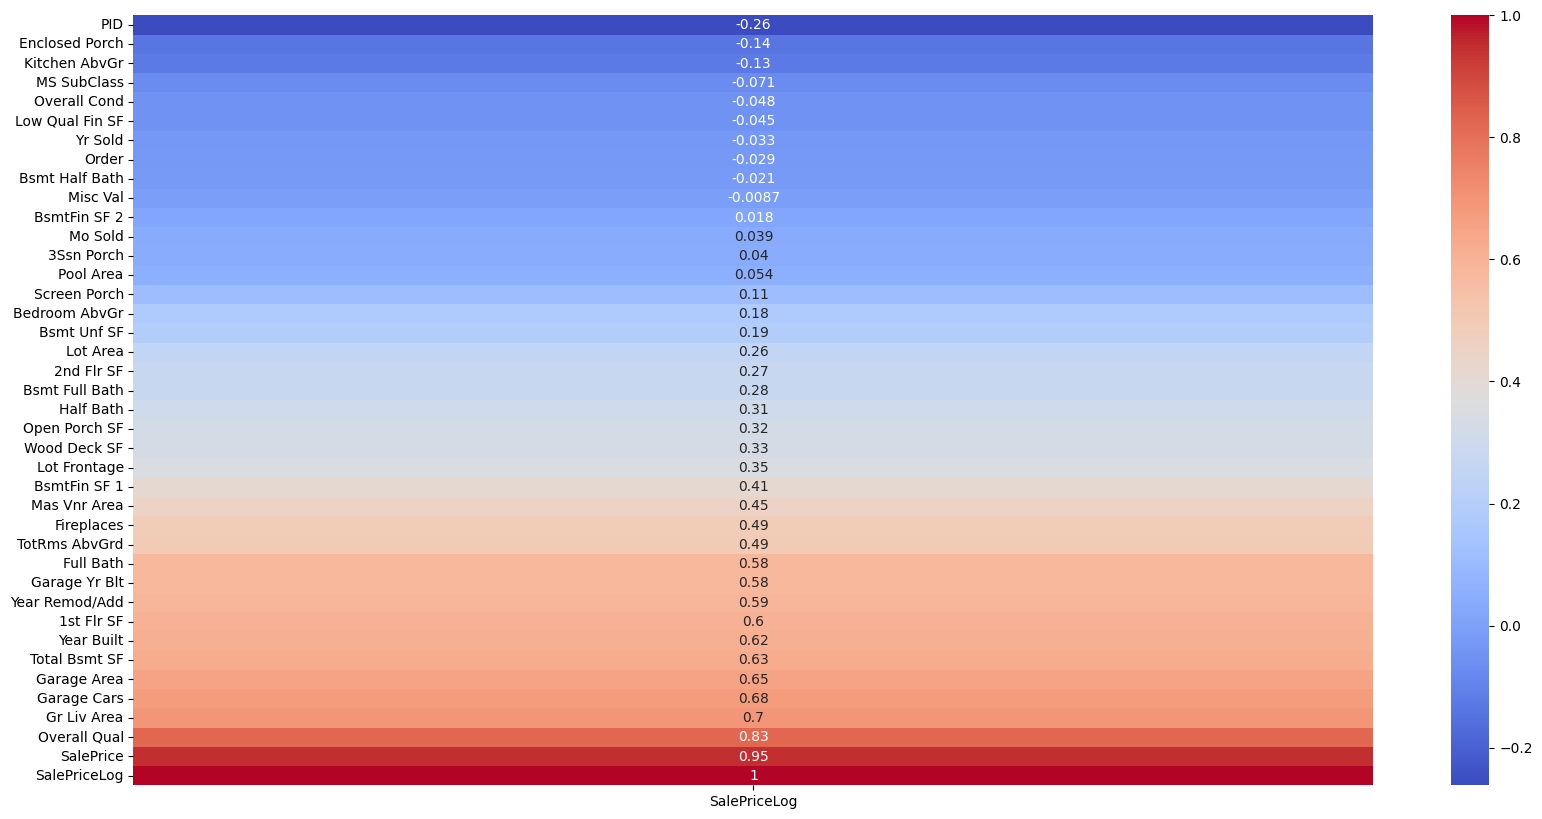

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix[['SalePriceLog']].sort_values("SalePriceLog"), annot=True, cmap="coolwarm")

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

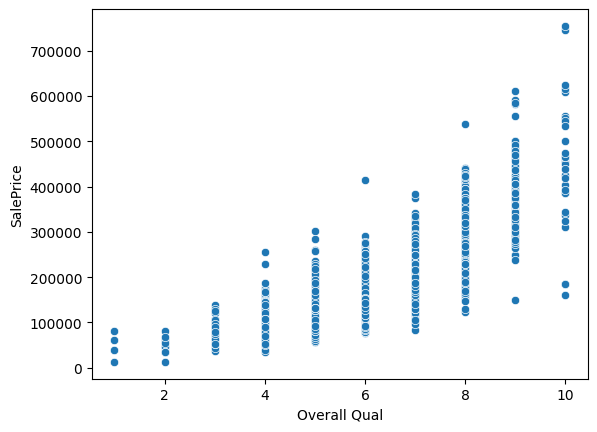

In [25]:
sns.scatterplot(data=data,x='Overall Qual', y='SalePrice')

### Réduction des colonnes

Nombre de valeur nulles

In [26]:
length = data.shape[0]
length

2930

In [27]:
data.isnull().sum().sort_values(ascending=False).head(20)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
dtype: int64

In [28]:
data_null_percent = data.isnull().sum() / length
data_null_percent_30 = data_null_percent[data_null_percent>0.3]
columns_null_30 = data_null_percent_30.index.tolist()

In [29]:
data_1 = data.drop(columns=columns_null_30, axis=1)
data_1.shape

(2930, 77)

correlation entre les variables

<Axes: >

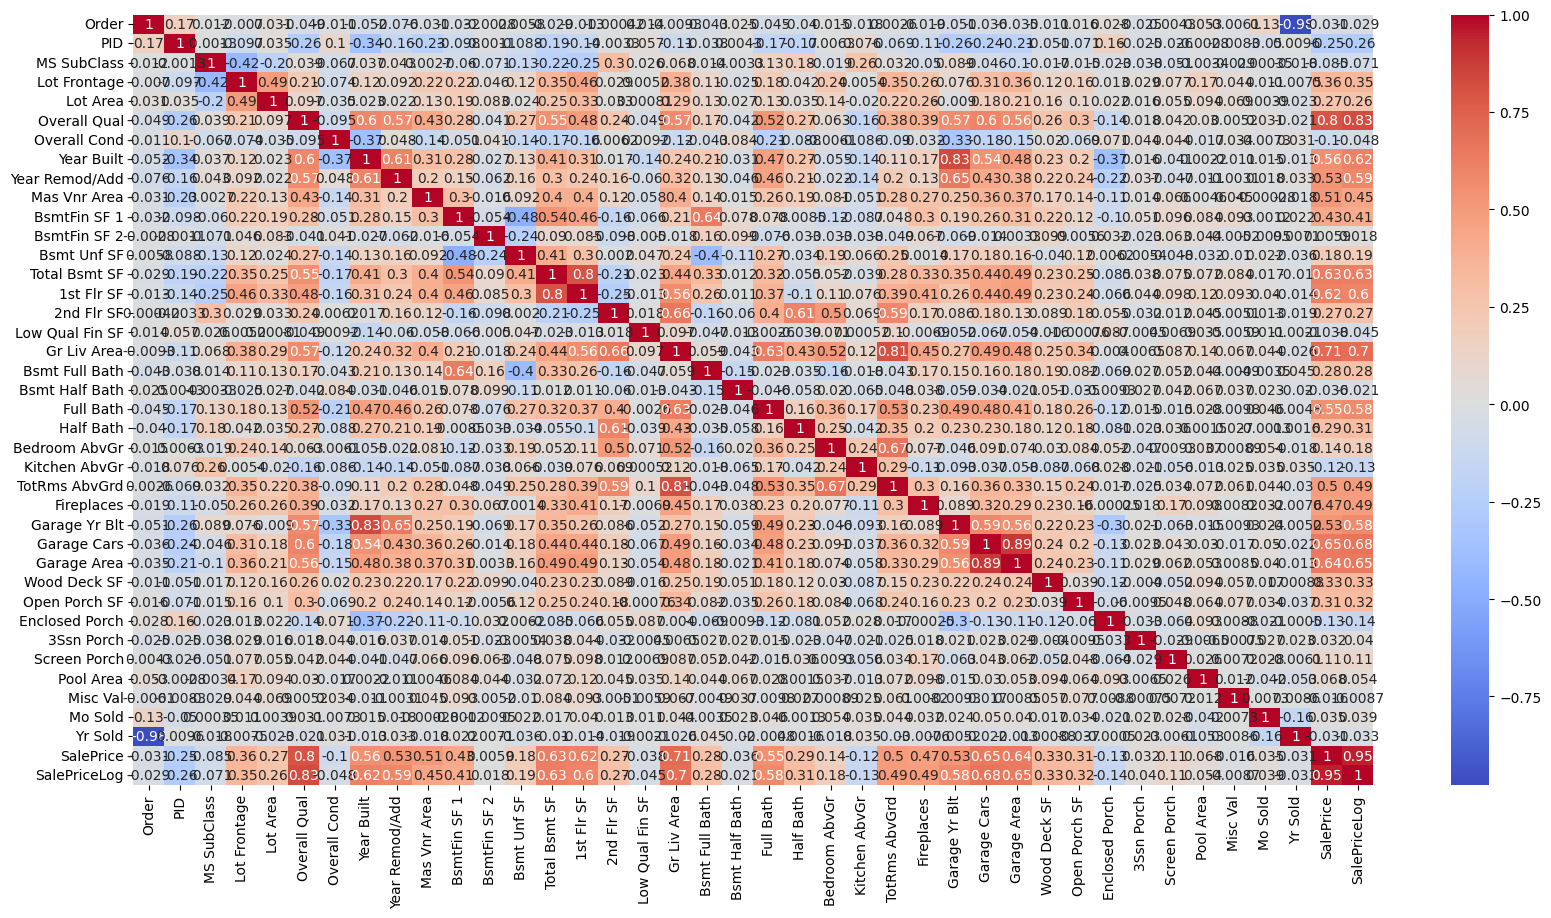

In [38]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_1.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [83]:
corr_target = data_1.corr(numeric_only=True)[['SalePriceLog']].abs().sort_values('SalePriceLog', ascending=False)
corr_target_to_drop = corr_target[corr_target['SalePriceLog'] < 0.3]
corr_target_to_drop = corr_target_to_drop.index.tolist()
corr_target = corr_target[corr_target['SalePriceLog'] > 0.3]
corr_target_columns = corr_target.index.tolist()
corr_target_columns.remove('SalePriceLog')
corr_target_columns.remove('SalePrice')
corr_target_columns

['Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Garage Area',
 'Total Bsmt SF',
 'Year Built',
 '1st Flr SF',
 'Year Remod/Add',
 'Garage Yr Blt',
 'Full Bath',
 'TotRms AbvGrd',
 'Fireplaces',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Lot Frontage',
 'Wood Deck SF',
 'Open Porch SF',
 'Half Bath']

In [85]:
corr_target_to_drop
data_2 = data_1.drop(columns=corr_target_to_drop, axis=1)
data_2.shape

(2930, 57)

suppression des doublons

<Axes: >

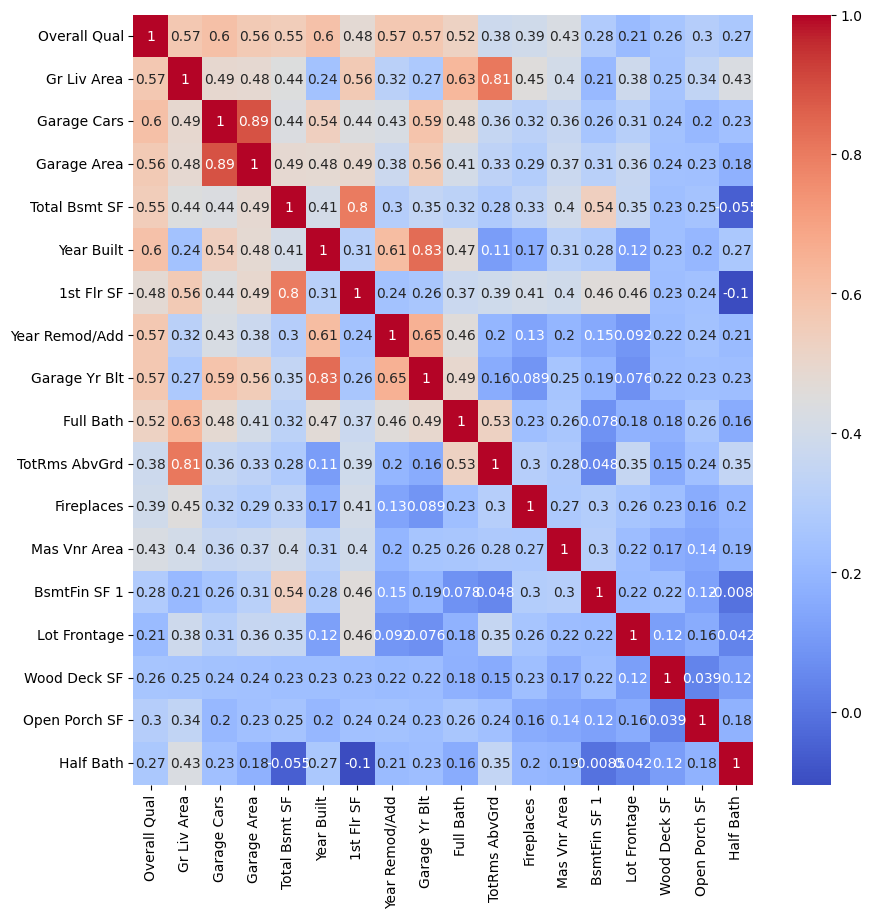

In [59]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix[corr_target_columns].loc[corr_target_columns], annot=True, cmap="coolwarm")

In [70]:
threshold = 0.8
high_corr_pairs = np.where(corr_matrix[corr_target_columns].loc[corr_target_columns] > threshold)
high_corr_pairs = [(corr_matrix[corr_target_columns].columns[x], corr_matrix[corr_target_columns].columns[y]) for x, y in zip(*high_corr_pairs) if x!=y and x<y]
high_corr_pairs

[('Gr Liv Area', 'TotRms AbvGrd'),
 ('Garage Cars', 'Garage Area'),
 ('Total Bsmt SF', '1st Flr SF'),
 ('Year Built', 'Garage Yr Blt')]

In [86]:
variables_to_remove = set()
for x, y in high_corr_pairs:
    if corr_target.loc[x].values[0] < corr_target.loc[y].values[0]:
        variables_to_remove.add(x)
    else:
        variables_to_remove.add(y)
variables_to_remove
data_3 = data_2.drop(columns=variables_to_remove, axis=1)
data_3.shape

(2930, 53)

<Axes: >

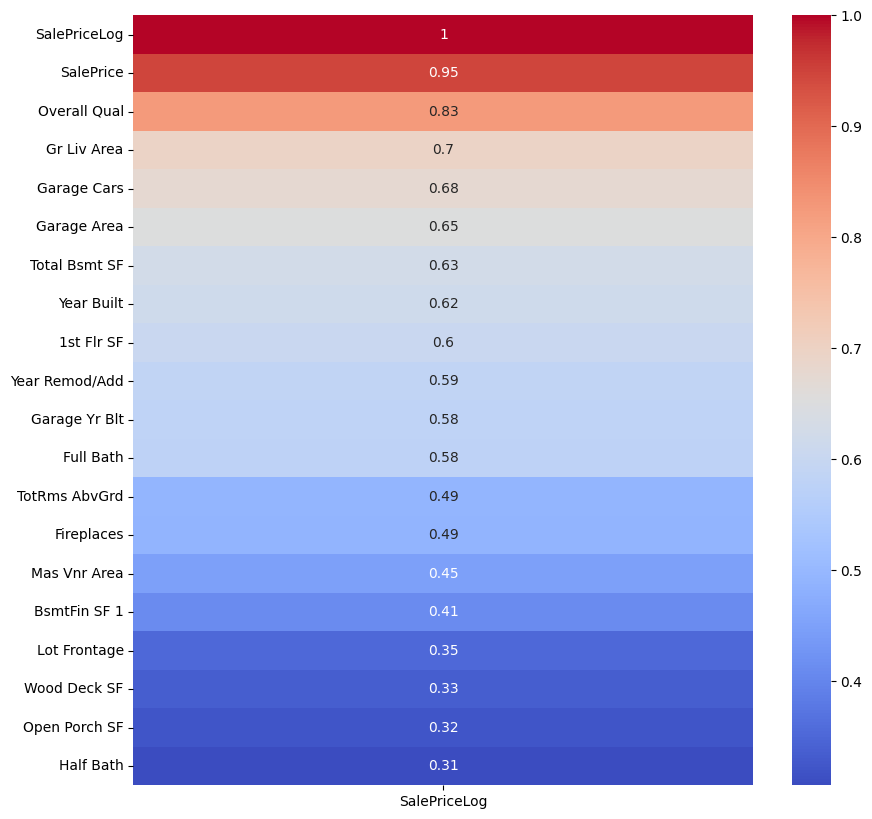

In [77]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_target, annot=True, cmap="coolwarm")

In [30]:
categorical_features = data_1.select_dtypes(include=["object"])
categorical_features.shape

(2930, 37)

In [90]:
categorical_features.nunique().sort_values(ascending=False).head(30)

Neighborhood      28
Exterior 2nd      17
Exterior 1st      16
Sale Type         10
Condition 1        9
Functional         8
Condition 2        8
House Style        8
Roof Matl          8
MS Zoning          7
Garage Type        6
Heating            6
BsmtFin Type 2     6
BsmtFin Type 1     6
Foundation         6
Roof Style         6
Sale Condition     6
Exter Cond         5
Lot Config         5
Garage Cond        5
Garage Qual        5
Kitchen Qual       5
Heating QC         5
Electrical         5
Bldg Type          5
Bsmt Cond          5
Bsmt Qual          5
Exter Qual         4
Bsmt Exposure      4
Land Contour       4
dtype: int64

In [32]:
n_cols = 5  
n_features = len(categorical_features.columns)
n_rows = (n_features + n_cols - 1) // n_cols
print(n_cols, n_rows)

5 8


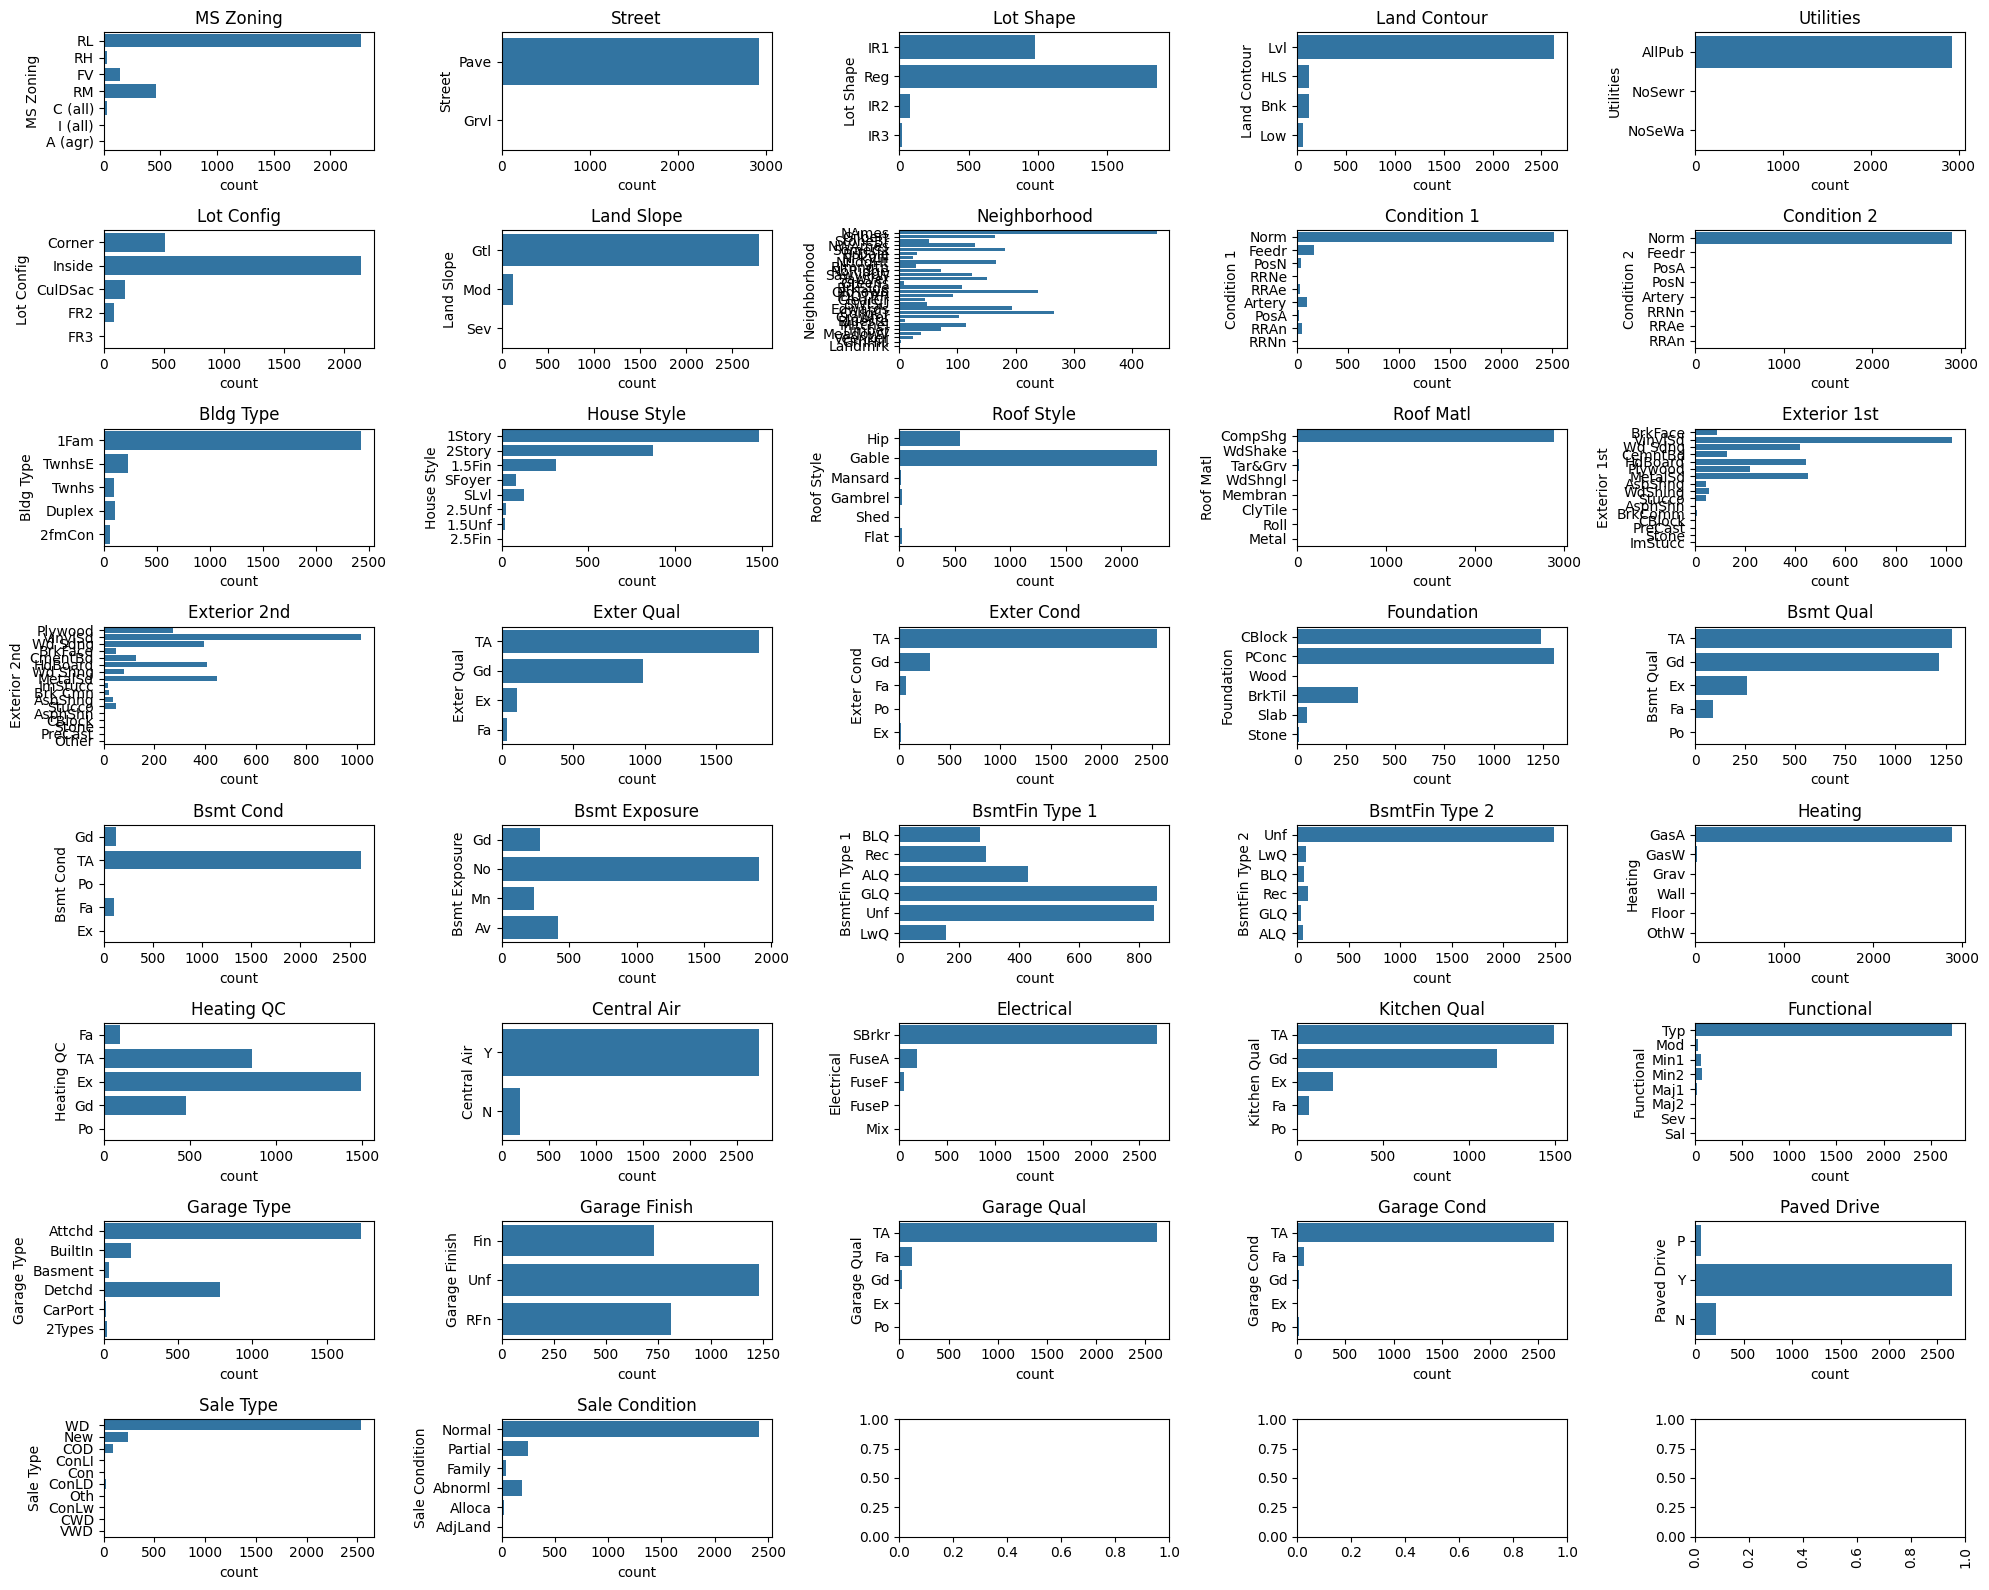

In [33]:

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 2 * n_rows))
for i, col in enumerate(categorical_features.columns):
    ax = axes[i // n_cols, i % n_cols]
    sns.countplot(data_1[col], ax=ax)
    ax.set_title(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

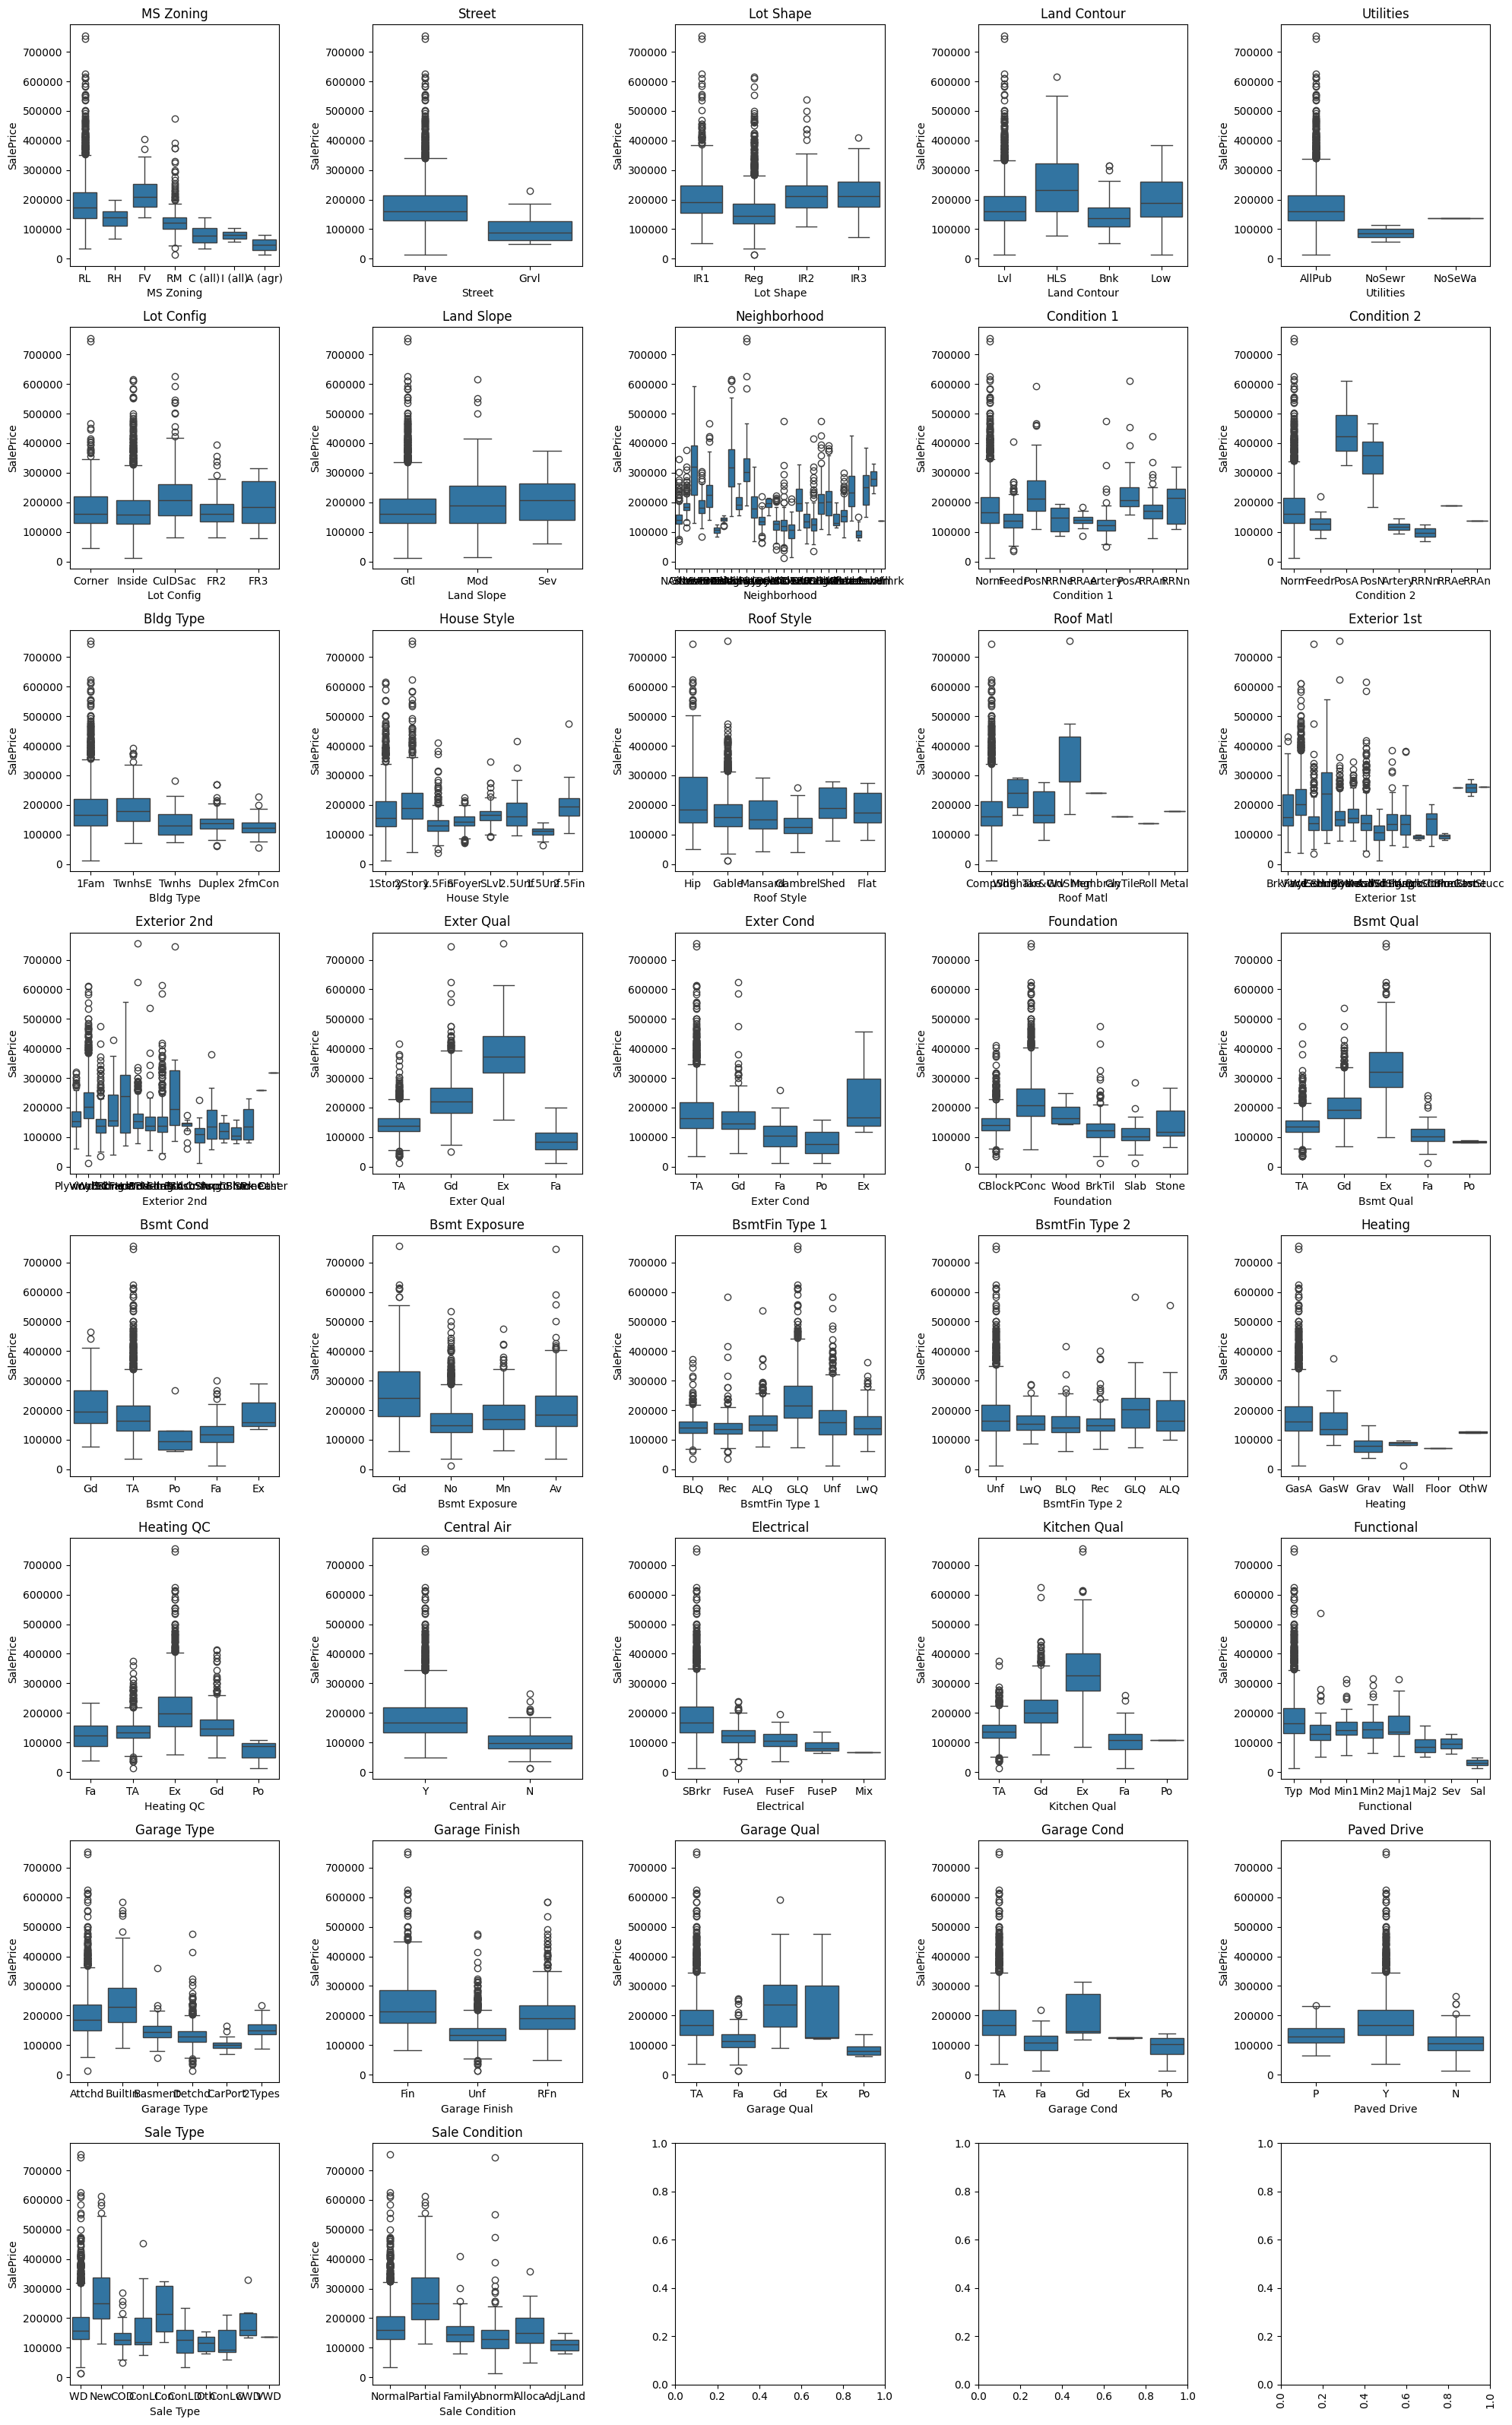

In [34]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
for i, col in enumerate(categorical_features.columns):
    ax = axes[i // n_cols, i % n_cols]
    sns.boxplot(data=data_1, x=col, y='SalePrice', ax=ax)
    ax.set_title(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

test anova

In [88]:
for col in categorical_features.columns:
    groups = [data_1[data_1[col]==cat]['SalePrice'] for cat in data_1[col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"{col} : p-value = {p_value:.3f}")

MS Zoning : p-value = 0.000
Street : p-value = 0.001
Lot Shape : p-value = 0.000
Land Contour : p-value = 0.000
Utilities : p-value = 0.213
Lot Config : p-value = 0.000
Land Slope : p-value = 0.001
Neighborhood : p-value = 0.000
Condition 1 : p-value = 0.000
Condition 2 : p-value = 0.000
Bldg Type : p-value = 0.000
House Style : p-value = 0.000
Roof Style : p-value = 0.000
Roof Matl : p-value = 0.000
Exterior 1st : p-value = 0.000
Exterior 2nd : p-value = 0.000
Exter Qual : p-value = 0.000
Exter Cond : p-value = 0.000
Foundation : p-value = 0.000
Bsmt Qual : p-value = nan
Bsmt Cond : p-value = nan
Bsmt Exposure : p-value = nan
BsmtFin Type 1 : p-value = nan
BsmtFin Type 2 : p-value = nan
Heating : p-value = 0.000
Heating QC : p-value = 0.000
Central Air : p-value = 0.000
Electrical : p-value = nan
Kitchen Qual : p-value = 0.000
Functional : p-value = 0.000
Garage Type : p-value = nan
Garage Finish : p-value = nan
Garage Qual : p-value = nan
Garage Cond : p-value = nan
Paved Drive : p-v

/tmp/ipykernel_1258/1947499524.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(*groups)


In [102]:
cat_to_remove = categorical_features.columns.tolist()
cat_to_remove = [col for col in cat_to_remove if col not in ['Bmst Qual', 'Garage Finish', 'Paved Drive', 'Central Air', 'Kitchen Qual']]
data_4 = data_3.drop(columns=cat_to_remove, axis=1)
data_4.shape

(2930, 20)

In [103]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2440 non-null   float64
 1   Overall Qual    2930 non-null   int64  
 2   Year Built      2930 non-null   int64  
 3   Year Remod/Add  2930 non-null   int64  
 4   Mas Vnr Area    2907 non-null   float64
 5   BsmtFin SF 1    2929 non-null   float64
 6   Total Bsmt SF   2929 non-null   float64
 7   Central Air     2930 non-null   object 
 8   Gr Liv Area     2930 non-null   int64  
 9   Full Bath       2930 non-null   int64  
 10  Half Bath       2930 non-null   int64  
 11  Kitchen Qual    2930 non-null   object 
 12  Fireplaces      2930 non-null   int64  
 13  Garage Finish   2771 non-null   object 
 14  Garage Cars     2929 non-null   float64
 15  Paved Drive     2930 non-null   object 
 16  Wood Deck SF    2930 non-null   int64  
 17  Open Porch SF   2930 non-null   i

In [104]:
data_4.to_csv("AmesHousing_features.csv", index=False)